In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv('coimbatore_weather_2019_2023_logic.csv')

In [3]:
input_date = '2023-01-18'
X=weather_df[weather_df['Date'] < input_date]
X = weather_df.drop(['Summary', 'Date', 'Time'], axis=1)
y_temp=X['Temperature (°C)']
y_humidity=X['Humidity (%)']
y_wind=X['Wind Speed (km/h)']

In [4]:
rf_temp = RandomForestRegressor()
rf_wind = RandomForestRegressor()
rf_humidity = RandomForestRegressor()

In [5]:
rf_temp.fit(X, y_temp)
rf_wind.fit(X, y_wind)
rf_humidity.fit(X, y_humidity)

RandomForestRegressor()

In [6]:
def predict_weather(date):
    historical_data = weather_df[weather_df['Date'] < date]
    X_test = historical_data.drop(['Summary', 'Date', 'Time'], axis=1)
    predicted_temp = rf_temp.predict(X_test)
    predicted_wind = rf_wind.predict(X_test)
    predicted_humidity = rf_humidity.predict(X_test)
    date_data = weather_df[weather_df['Date'] == date]
    date_data['Month'] = pd.to_datetime(date_data['Date']).dt.month
    date_data['Hour'] = pd.to_datetime(date_data['Time']).dt.hour
    summary = []
    for i in range(len(date_data)):
        if date_data.iloc[i]['Month'] in [12, 1, 2]:
            summary.append('Mostly Sunny') if date_data.iloc[i]['Hour'] in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] else summary.append('Partly Cloudy')
        elif date_data.iloc[i]['Month'] in [3, 4, 5]:
            if date_data.iloc[i]['Hour'] in [12, 13, 14, 15]:
                summary.append('Mostly Sunny') 
            elif date_data.iloc[i]['Hour'] in [16, 17, 18]:
                summary.append('Partly Cloudy')
            else:
                summary.append('Clear')
        elif date_data.iloc[i]['Month'] in [6,7, 8, 9]:
            if date_data.iloc[i]['Wind Speed (km/h)'] > 7:
                summary.append('Mostly Windy')
            else:
                summary.append('Rainy') if np.random.rand() < 0.4 else summary.append('Mostly Cloudy')
        else:
            if date_data.iloc[i]['Hour'] in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]:
                summary.append('Partly Cloudy')
            else:
                summary.append('Clear')
    predictions = pd.DataFrame({'Time': date_data['Time'].values,
                                'Temperature (°C)': predicted_temp[-len(date_data):],
                                'Wind Speed (km/h)': predicted_wind[-len(date_data):],
                                'Humidity (%)': predicted_humidity[-len(date_data):],
                                'Summary': summary})
    return predictions

In [7]:
def plot_actual_weather(actual_data):
    plt.figure(figsize=(10, 6))
    plt.plot(actual_data['Time'], actual_data['Temperature (°C)'], label='Temperature (°C)')
    plt.plot(actual_data['Time'], actual_data['Wind Speed (km/h)'], label='Wind Speed (km/h)')
    plt.plot(actual_data['Time'], actual_data['Humidity (%)'], label='Humidity (%)')
    plt.xticks(rotation=45)
    plt.grid('True')
    plt.title('Actual Weather Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [8]:
def plot_predicted_weather(predicted_data):
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_data['Time'], predicted_data['Temperature (°C)'], label='Predicted Temperature (°C)')
    plt.plot(predicted_data['Time'], predicted_data['Wind Speed (km/h)'], label='Predicted Wind Speed (km/h)')
    plt.plot(predicted_data['Time'], predicted_data['Humidity (%)'], label='Predicted Humidity (%)')
    plt.xticks(rotation=45)
    plt.title('Predicted Weather Data')
    plt.grid('True')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [9]:
weather_predictions = predict_weather(input_date)
actual_data = weather_df[weather_df['Date'] == input_date]

C:\Users\kisho\AppData\Local\Temp\ipykernel_10152\666554454.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['Month'] = pd.to_datetime(date_data['Date']).dt.month
C:\Users\kisho\AppData\Local\Temp\ipykernel_10152\666554454.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_data['Hour'] = pd.to_datetime(date_data['Time']).dt.hour
C:\Users\kisho\AppData\Local\Temp\ipykernel_10152\666554454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
print('Actual Weather Data:')
actual_data_single_date = actual_data[actual_data['Date'] == input_date]
actual_data_single_date = actual_data_single_date.drop(['Date'], axis=1)
print(actual_data_single_date.to_string(index=False))

Actual Weather Data:
 Time  Temperature (°C)  Wind Speed (km/h)  Humidity (%)       Summary
00:00                23                  5            62 Partly Cloudy
01:00                23                  5            55 Partly Cloudy
02:00                23                  4            61 Partly Cloudy
03:00                23                  5            64 Partly Cloudy
04:00                28                  4            61 Partly Cloudy
05:00                27                  5            61 Partly Cloudy
06:00                29                  5            67  Mostly Sunny
07:00                27                  6            59  Mostly Sunny
08:00                24                  4            58  Mostly Sunny
09:00                25                  5            51  Mostly Sunny
10:00                23                  6            56  Mostly Sunny
11:00                26                  4            68  Mostly Sunny
12:00                27                  6            57

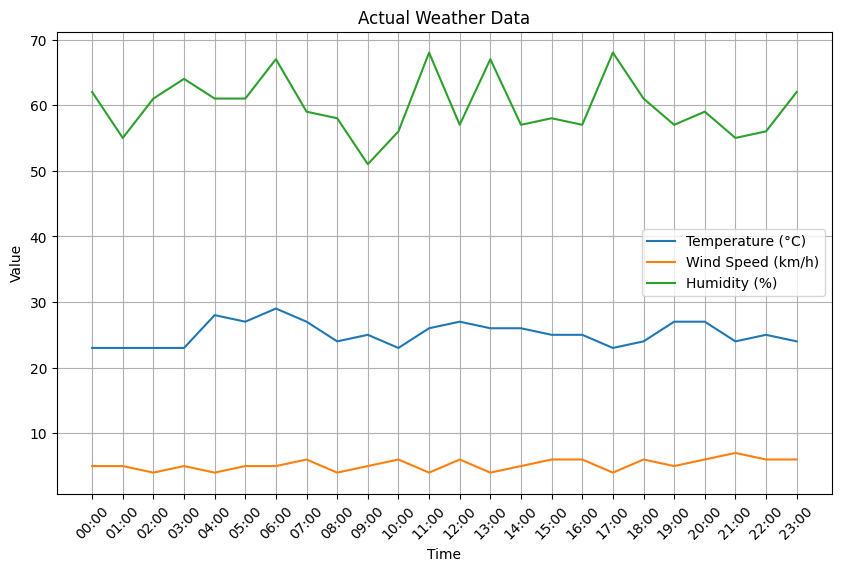

In [11]:
plot_actual_weather(actual_data)

In [12]:
print('Predicted Weather Data:')
print(weather_predictions.to_string(index=False))

Predicted Weather Data:
 Time  Temperature (°C)  Wind Speed (km/h)  Humidity (%)       Summary
00:00              22.0                6.0          50.0 Partly Cloudy
01:00              28.0                5.0          56.0 Partly Cloudy
02:00              22.0                3.0          56.0 Partly Cloudy
03:00              22.0                6.0          59.0 Partly Cloudy
04:00              23.0                6.0          65.0 Partly Cloudy
05:00              22.0                3.0          62.0 Partly Cloudy
06:00              24.0                5.0          62.0  Mostly Sunny
07:00              26.0                5.0          64.0  Mostly Sunny
08:00              23.0                5.0          64.0  Mostly Sunny
09:00              20.0                6.0          68.0  Mostly Sunny
10:00              24.0                4.0          63.0  Mostly Sunny
11:00              24.0                3.0          60.0  Mostly Sunny
12:00              24.0                4.0          5

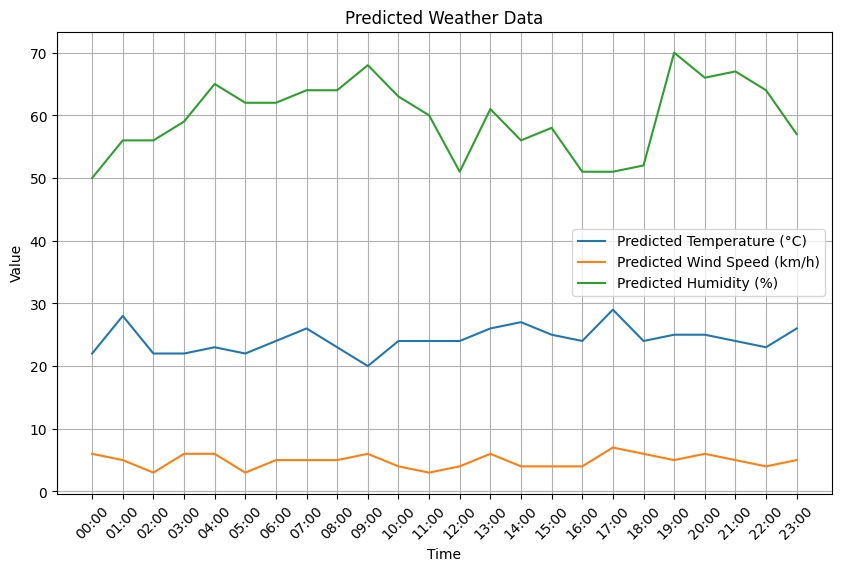

In [13]:
plot_predicted_weather(weather_predictions)

In [14]:
actual_temp = weather_df[weather_df['Date'] == input_date]['Temperature (°C)']
predicted_temp = weather_predictions['Temperature (°C)']
mae1 = mean_absolute_error(actual_temp, predicted_temp)
print("MAE Score for Temperature:", mae1)
actual_wind = weather_df[weather_df['Date'] == input_date]['Wind Speed (km/h)']
predicted_wind = weather_predictions['Wind Speed (km/h)']
mae2 = mean_absolute_error(actual_wind, predicted_wind)
print("MAE Score for Wind Speed:", mae2)
actual_humidity = weather_df[weather_df['Date'] == input_date]['Humidity (%)']
predicted_humidity = weather_predictions['Humidity (%)']
mae3 = mean_absolute_error(actual_humidity, predicted_humidity)
print("MAE Score for Humidity:", mae3)

MAE Score for Temperature: 2.1666666666666665
MAE Score for Wind Speed: 1.25
MAE Score for Humidity: 6.916666666666667


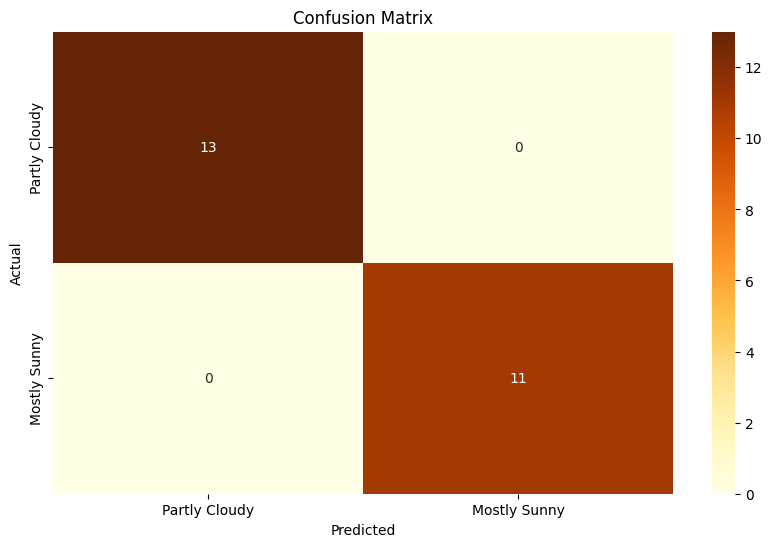

In [15]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(actual_data['Summary'], weather_predictions['Summary'])
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=weather_predictions['Summary'].unique(), yticklabels=weather_predictions['Summary'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()